# Predicting the prices of Avacados

### About the data-
> The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

#### Display image using pythom

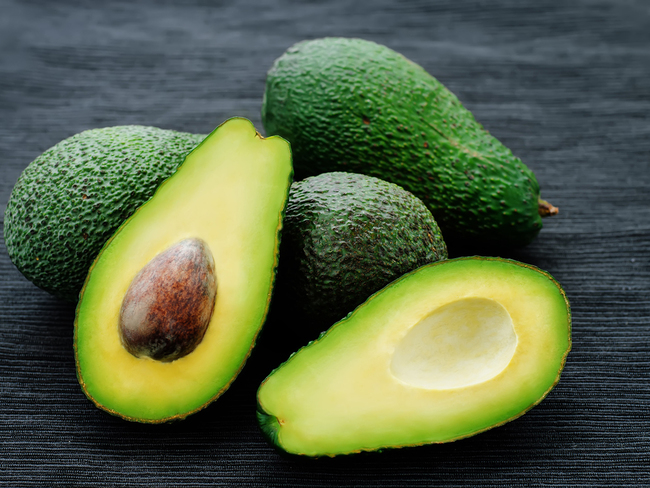

In [8]:
from IPython.display import Image
url = "G:\My Drive\FSDC 10.30\Machine Learning\Resume Project\RESUME PROJECT 1-- PRICE PREDICTION\Fruti.jpg"
Image(url)

#### Import libraries

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

#### Read the dataset

In [11]:
data = pd.read_csv(r"G:\My Drive\FSDC 10.30\Machine Learning\Resume Project\RESUME PROJECT 1-- PRICE PREDICTION\avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [12]:
data.shape

(18249, 14)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [14]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [15]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [16]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


#### Values gives attributes in numpy representation

In [19]:
data.values

array([[0, '2015-12-27', 1.33, ..., 'conventional', 2015, 'Albany'],
       [1, '2015-12-20', 1.35, ..., 'conventional', 2015, 'Albany'],
       [2, '2015-12-13', 0.93, ..., 'conventional', 2015, 'Albany'],
       ...,
       [9, '2018-01-21', 1.87, ..., 'organic', 2018, 'WestTexNewMexico'],
       [10, '2018-01-14', 1.93, ..., 'organic', 2018, 'WestTexNewMexico'],
       [11, '2018-01-07', 1.62, ..., 'organic', 2018, 'WestTexNewMexico']],
      dtype=object)

#### Remove index from dataset

In [22]:
avocado = data.reset_index(drop=True)
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Sorting

In [37]:
avocado.sort_values(["AveragePrice","year"],ascending = [True,False])

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15261,43,2017-03-05,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.00,organic,2017,CincinnatiDayton
7412,47,2017-02-05,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017,PhoenixTucson
15473,43,2017-03-05,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit
15262,44,2017-02-26,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017,CincinnatiDayton
1716,0,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16720,18,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro
16055,42,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale
14124,7,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco
17428,37,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa


#### Subsetting

In [38]:
# Subsetting column

avocado["AveragePrice"]

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [41]:
avocado[["AveragePrice","Date"]]

,AveragePrice,Date
0,1.33,2015-12-27
1,1.35,2015-12-20
2,0.93,2015-12-13
3,1.08,2015-12-06
4,1.28,2015-11-29
...,...,...
18244,1.63,2018-02-04
18245,1.71,2018-01-28
18246,1.87,2018-01-21
18247,1.93,2018-01-14


In [42]:
# Subsetting rows

avocado["AveragePrice"]<1

0        False
1        False
2         True
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Name: AveragePrice, Length: 18249, dtype: bool

In [44]:
# Avocado <1 which shows

avocado[avocado["AveragePrice"]<1]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
13,13,2015-09-27,0.99,106803.39,1204.88,99409.21,154.84,6034.46,5888.87,145.59,0.0,conventional,2015,Albany
43,43,2015-03-01,0.99,55595.74,629.46,45633.34,181.49,9151.45,8986.06,165.39,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17169,43,2017-03-05,0.99,155011.12,35367.23,5175.81,5.91,114462.17,95379.07,19083.10,0.0,organic,2017,SouthCentral
17170,44,2017-02-26,0.99,171145.00,34520.03,6936.39,0.00,129688.58,117252.31,12436.27,0.0,organic,2017,SouthCentral
17536,39,2017-04-02,0.98,402676.23,34093.33,58330.53,207.85,310044.52,155701.41,154343.11,0.0,organic,2017,West
17537,40,2017-03-26,0.90,456645.91,36169.35,51398.72,139.55,368938.29,152159.53,216778.76,0.0,organic,2017,West


In [45]:
# Subsetting based on text data


avocado[avocado["type"]=="organic"]

# subsetting type rows as "organic" which shows.

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,3,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,4,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [48]:
# Subsetting based on date

avocado[avocado["Date"]<="2015-02-04"]

# Date before "2015-02-04" shows.

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
47,47,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany
48,48,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
49,49,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
50,50,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,46,2015-02-01,1.77,7210.19,1634.42,3012.44,0.00,2563.33,2563.33,0.00,0.0,organic,2015,WestTexNewMexico
11929,47,2015-01-25,1.63,7324.06,1934.46,3032.72,0.00,2356.88,2320.00,36.88,0.0,organic,2015,WestTexNewMexico
11930,48,2015-01-18,1.71,5508.20,1793.64,2078.72,0.00,1635.84,1620.00,15.84,0.0,organic,2015,WestTexNewMexico
11931,49,2015-01-11,1.69,6861.73,1822.28,2377.54,0.00,2661.91,2656.66,5.25,0.0,organic,2015,WestTexNewMexico


In [58]:
# Subsetting multiple columns
avocado[(avocado["Date"]<"2015-02-04") & (avocado["type"]=="organic")]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9173,47,2015-02-01,1.83,1228.51,33.12,99.36,0.0,1096.03,1096.03,0.00,0.0,organic,2015,Albany
9174,48,2015-01-25,1.89,1115.89,14.87,148.72,0.0,952.30,952.30,0.00,0.0,organic,2015,Albany
9175,49,2015-01-18,1.93,1118.47,8.02,178.78,0.0,931.67,931.67,0.00,0.0,organic,2015,Albany
9176,50,2015-01-11,1.77,1182.56,39.00,305.12,0.0,838.44,838.44,0.00,0.0,organic,2015,Albany
9177,51,2015-01-04,1.79,1373.95,57.42,153.88,0.0,1162.65,1162.65,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,46,2015-02-01,1.77,7210.19,1634.42,3012.44,0.0,2563.33,2563.33,0.00,0.0,organic,2015,WestTexNewMexico
11929,47,2015-01-25,1.63,7324.06,1934.46,3032.72,0.0,2356.88,2320.00,36.88,0.0,organic,2015,WestTexNewMexico
11930,48,2015-01-18,1.71,5508.20,1793.64,2078.72,0.0,1635.84,1620.00,15.84,0.0,organic,2015,WestTexNewMexico
11931,49,2015-01-11,1.69,6861.73,1822.28,2377.54,0.0,2661.91,2656.66,5.25,0.0,organic,2015,WestTexNewMexico


In [49]:
# Filtering one attribute

regionFilter = avocado["region"].isin(["Boston", "SanDiego"])
avocado[regionFilter]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
208,0,2015-12-27,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.0,conventional,2015,Boston
209,1,2015-12-20,1.07,489802.88,4912.37,390100.99,5887.72,88901.80,88768.47,133.33,0.0,conventional,2015,Boston
210,2,2015-12-13,1.01,549945.76,4641.02,455362.38,219.40,89722.96,89523.38,199.58,0.0,conventional,2015,Boston
211,3,2015-12-06,1.02,488679.31,5126.32,407520.22,142.99,75889.78,75666.22,223.56,0.0,conventional,2015,Boston
212,4,2015-11-29,1.19,350559.81,3609.25,272719.08,105.86,74125.62,73864.52,261.10,0.0,conventional,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18100,7,2018-02-04,1.81,17454.74,1158.41,7388.27,0.00,8908.06,8908.06,0.00,0.0,organic,2018,SanDiego
18101,8,2018-01-28,1.91,17579.47,1145.64,8284.41,0.00,8149.42,8149.42,0.00,0.0,organic,2018,SanDiego
18102,9,2018-01-21,1.95,18676.37,1088.49,9282.37,0.00,8305.51,8305.51,0.00,0.0,organic,2018,SanDiego
18103,10,2018-01-14,1.81,21770.02,3285.98,14338.52,0.00,4145.52,4145.52,0.00,0.0,organic,2018,SanDiego


In [57]:
# Filtering multiple attributes

# subset the avocado in the region Boston or SanDiego in the year 2016 or 2017
regionFilter = avocado["region"].isin(["Boston", "SanDiego"])
yearFilter = avocado["year"].isin(["2016", "2017"])

avocado[regionFilter & yearFilter]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


#### Detecting missing value

In [59]:
avocado.isna()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
avocado.isna().any()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [61]:
# Counting missing value

avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### Adding new columns

In [62]:
avocado["AveragePricePer100"] = avocado["AveragePrice"]*100
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePer100
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,133.0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,135.0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,93.0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,108.0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,163.0
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,171.0
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,187.0
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,193.0


#### Deleting columns in dataframe

In [80]:
avocado.drop(["AveragePricePer100"],axis = 1,inplace=True)
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### Summary Statistic

In [75]:
# Mean

avocado["AveragePrice"].mean()

1.405978409775878

In [76]:
avocado["AveragePrice"].median()

1.37

In [77]:
avocado["Date"].max()

'2018-03-25'

In [78]:
avocado["Date"].min()

'2015-01-04'

# Group by  (Split the data as per group)


In [79]:
avocado.groupby(["year","type"])["AveragePrice"].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

# Pivot_table (Reshape the data)

In [ ]:
avocado.pivot_table

### Setting column as index

In [81]:
regionIndex = avocado.set_index(["region"])
regionIndex

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
region,,,,,,,,,,,,,
Albany,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
Albany,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
Albany,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
Albany,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
Albany,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WestTexNewMexico,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018
WestTexNewMexico,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018
WestTexNewMexico,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018


In [82]:
avocado[avocado["region"].isin(["Albany", "WestTexNewMexico"])]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#  Visualizing the dataset

#### Visualize the "AveragePrice".

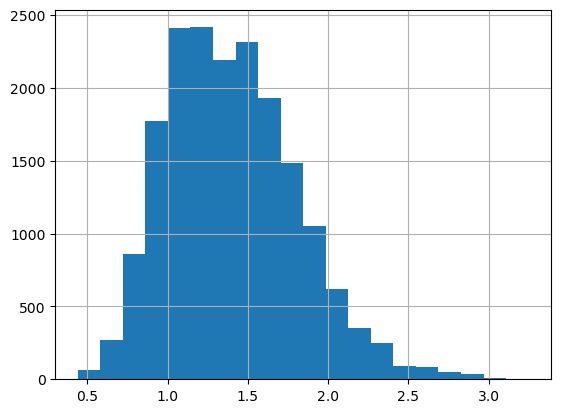

In [86]:
avocado["AveragePrice"].hist(bins=20)
plt.show()

(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <BarContainer object of 10 artists>)

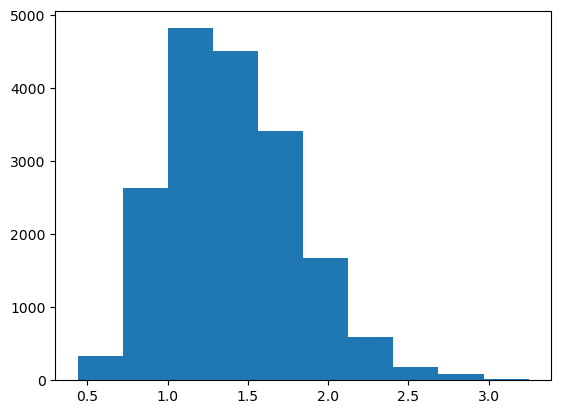

In [94]:
plt.hist(avocado["AveragePrice"])

#### Average Price of Avocado compare with years

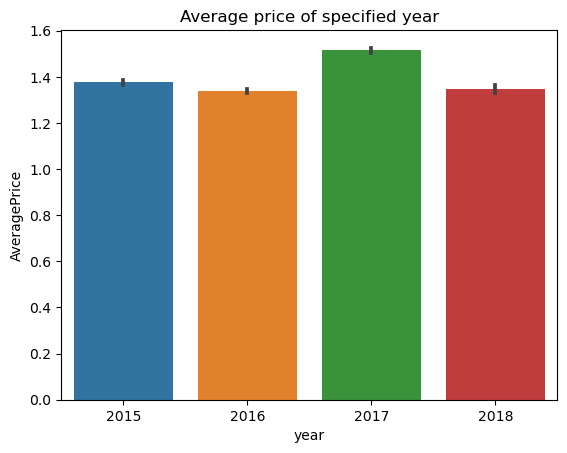

In [101]:
sns.barplot(x ="year",y = "AveragePrice", data = avocado)
plt.title ("Average price of specified year")
plt.show()

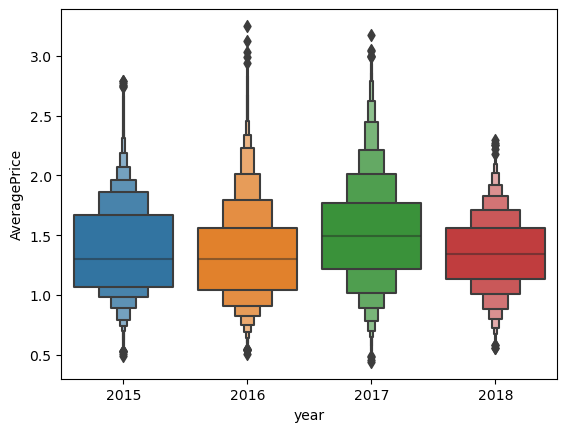

In [125]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

#### Average Price of avocado should be slightly more in year 2017 and again drop in year 2018.

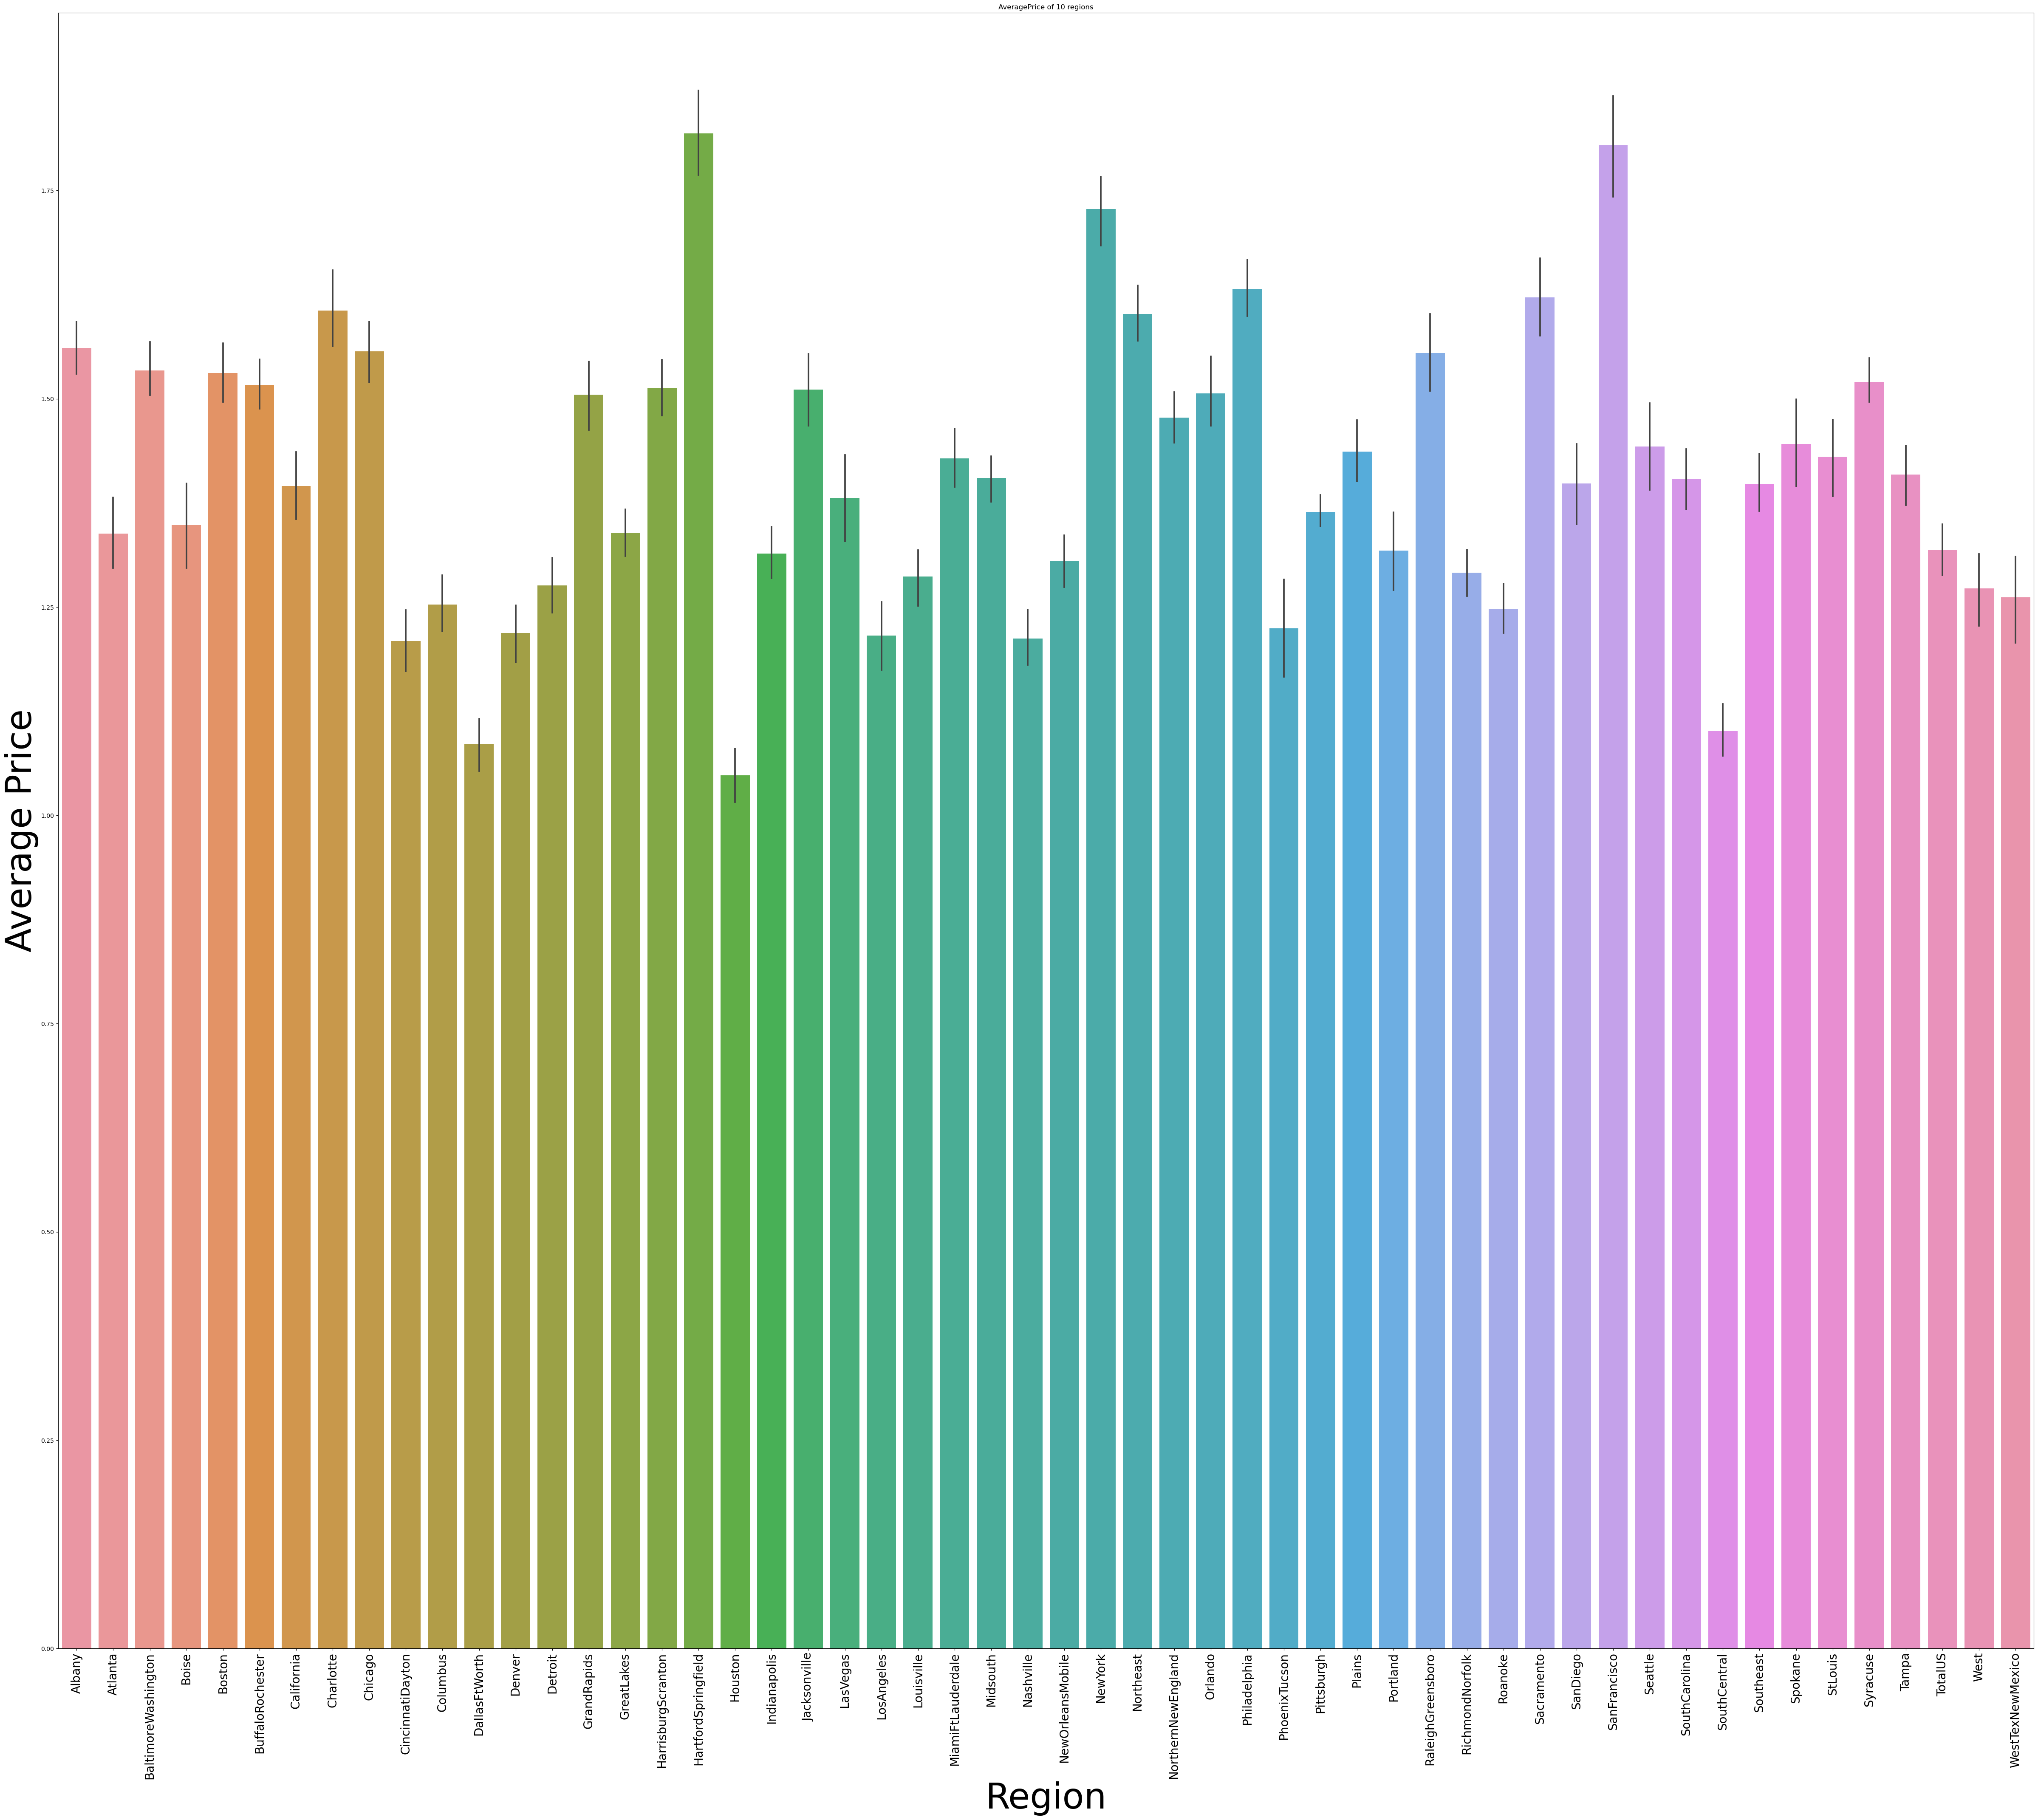

In [216]:
plt.figure(figsize = (60,50))

sns.barplot(x = "region",y = "AveragePrice", data = avocado)
plt.title("AveragePrice of 10 regions")
plt.xlabel("Region",fontsize = 60)
plt.xticks(rotation = 90,fontsize = 20)
plt.ylabel("Average Price",fontsize = 60)
plt.show()

In [87]:
regionFilter = avocado.groupby("region")["AveragePrice"].mean().head(10)
regionFilter

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Name: AveragePrice, dtype: float64

<Axes: title={'center': 'Average price in 10 regions'}, xlabel='region'>

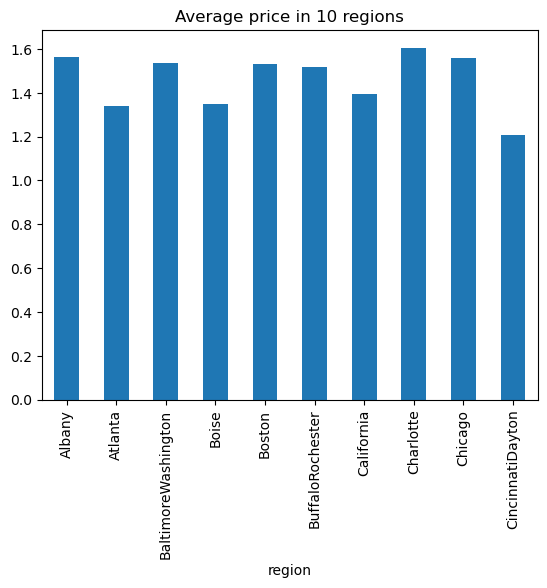

In [123]:
regionFilter.plot(kind = "bar",rot=90,title="Average price in 10 regions")

#### Average Price of fruit avocado should be high in some region and less in some region.

#### Boxplot

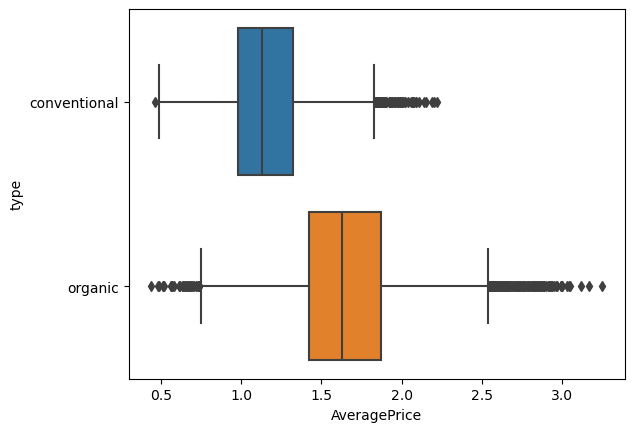

In [124]:
sns.boxplot(y="type", x="AveragePrice", data=data);

#### Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.

# Machine Learning Regression Algorithm

In [133]:
avocado.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,NaN,2015,Albany,DEC
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,NaN,2015,Albany,DEC
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,NaN,2015,Albany,DEC
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,NaN,2015,Albany,DEC
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,NaN,2015,Albany,NOV


#### y = Target variable, x = Independant variable

In [136]:
# Create dummy variables

dummies = pd.get_dummies(avocado[["year","region","Month"]],drop_first = True)
dummies


,year,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,2015,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,2015,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2015,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,2015,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
18245,2018,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
18246,2018,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
18247,2018,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [139]:
# Concat the all attributes

dummies_ = pd.concat([data[['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis = 1)
dummies_

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,...,True,False,False,False,False,False,False,False,False,False
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,...,True,False,False,False,False,False,False,False,False,False
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,...,True,False,False,False,False,False,False,False,False,False
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,...,True,False,False,False,False,False,False,False,False,False
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,...,False,True,False,False,False,False,False,False,False,False
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,...,False,False,True,False,False,False,False,False,False,False
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,...,False,False,True,False,False,False,False,False,False,False
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,...,False,False,True,False,False,False,False,False,False,False


In [145]:
# Split the dataset as 'x' and 'y'

x = dummies_
y = avocado["AveragePrice"]


In [147]:
print(x)

       Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  type  year  ...  Month_DEC  Month_FEB  \
0           93.25         

In [146]:
print(y)

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64


#### Split as train_test_split

In [154]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30,random_state = 0)


In [150]:
x_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
3984,2866855.58,1134719.15,643464.88,95527.46,993144.09,871562.92,104146.00,17435.17,0,2016,...,False,False,False,False,False,False,True,False,False,False
3163,6588277.70,1873878.11,2020327.87,302210.56,2391861.16,2091747.51,282242.79,17870.86,0,2016,...,False,True,False,False,False,False,False,False,False,False
17247,2375.19,181.23,861.34,0.00,1332.62,312.22,1020.40,0.00,1,2017,...,False,False,False,False,False,False,False,False,False,True
8884,1354912.98,628591.78,284087.44,15249.83,426983.93,200603.91,221593.36,4786.66,0,2018,...,False,False,True,False,False,False,False,False,False,False
16345,16661.59,1.21,105.02,0.00,16555.36,16555.36,0.00,0.00,1,2017,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,7665.70,1565.49,4210.72,0.00,1889.49,1133.33,756.16,0.00,1,2015,...,False,True,False,False,False,False,False,False,False,False
13123,80943.91,7720.21,22562.00,37.04,50624.66,38739.27,11885.39,0.00,1,2016,...,False,True,False,False,False,False,False,False,False,False
9845,7174.35,386.65,5898.07,0.00,889.63,516.67,372.96,0.00,1,2015,...,False,False,False,False,False,True,False,False,False,False
10799,3254.64,441.78,1817.74,15.61,979.51,72.11,907.40,0.00,1,2015,...,False,False,False,False,False,False,False,False,True,False


In [151]:
x_test

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
9181,4400.25,1358.53,1735.98,0.00,1305.74,130.00,1175.74,0.00,1,2015,...,True,False,False,False,False,False,False,False,False,False
1013,190716.43,4890.33,119457.27,13495.86,52872.97,30631.37,21037.53,1204.07,0,2015,...,False,False,False,True,False,False,False,False,False,False
14625,1045450.41,105069.07,352698.21,9425.64,578257.49,252881.52,325375.97,0.00,1,2016,...,False,False,False,False,False,True,False,False,False,False
15234,9883.59,313.75,4230.58,0.00,5339.26,2166.91,3172.35,0.00,1,2017,...,False,False,False,False,False,False,False,False,False,True
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,1,2018,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17389,2443.57,0.00,113.63,0.00,2329.94,1777.21,552.73,0.00,1,2017,...,False,False,True,False,False,False,False,False,False,False
16636,81982.77,5449.39,23565.89,1102.12,51865.37,21163.88,30701.49,0.00,1,2017,...,False,False,False,False,False,True,False,False,False,False
7645,200632.61,44304.44,81995.44,1367.96,72964.77,70410.57,2293.63,260.57,0,2017,...,False,False,False,False,False,False,False,False,False,True
11356,27556.76,17561.23,9396.92,0.00,598.61,598.61,0.00,0.00,1,2015,...,False,True,False,False,False,False,False,False,False,False


In [152]:
y_train

3984     0.82
3163     0.89
17247    2.94
8884     0.81
16345    1.57
         ... 
9225     1.44
13123    1.07
9845     1.92
10799    1.86
2732     0.92
Name: AveragePrice, Length: 12774, dtype: float64

In [155]:
y_test

9181     1.48
1013     1.05
14625    1.27
15234    2.15
18247    1.93
         ... 
17389    1.70
16636    1.51
7645     1.44
11356    1.35
3016     1.28
Name: AveragePrice, Length: 5475, dtype: float64

#### Feature Scaling

In [157]:
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[cols_to_std])

StandardScaler()

In [158]:
# Importscikit libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_scor

# Multiple linear regression

In [212]:
regressor= LinearRegression()
regressor.fit(x,y)

y_pred = regressor.predict(x_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2  = r2_score(y_test,y_pred)
                      
    

In [213]:
y_pred

array([1.44700019, 1.05604109, 1.49440887, ..., 1.27035341, 1.83324221,
       1.2039618 ])

In [214]:
print("MAE :",MAE)
print("MSE  :",MSE)
print("R2 :",R2)

MAE : 0.18748303811328093
MSE  : 0.06105420062475199
R2 : 0.6218379485032199


# KNN

In [208]:
regressor1 = KNeighborsRegressor(n_neighbors = 3)
regressor1.fit(x,y)

y1_pred = regressor1.predict(x_test)

MAE = mean_absolute_error(y_test,y1_pred)
MSE = mean_squared_error(y_test,y1_pred)
R2  = r2_score(y_test,y1_pred)
                         

In [209]:
y1_pred

array([1.59666667, 0.99666667, 1.11      , ..., 1.42333333, 1.41333333,
       1.33666667])

# Decision Tree Regressor

In [199]:
regressor2 = DecisionTreeRegressor(criterion = 'friedman_mse',splitter = 'random')
regressor2.fit(x,y)

y3_pred = regressor2.predict(x_test)

MAE = mean_absolute_error(y_test,y3_pred)
MSE = mean_squared_error(y_test,y3_pred)
R2  = r2_score(y_test,y3_pred)

In [200]:
y3_pred

array([1.48, 1.05, 1.27, ..., 1.44, 1.35, 1.28])

In [201]:
print("MAE :",MAE)
print("MSE  :",MSE)
print("R2 :",R2)

MAE : 3.447267839018751e-19
MSE  : 6.078551495709851e-35
R2 : 1.0


# Random Forest Regressor

In [203]:
 
regressor4 = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor4.fit(x,y)

y4_pred = regressor4.predict(x_test)

MAE = mean_absolute_error(y_test,y4_pred)
MSE = mean_squared_error(y_test,y4_pred)
R2  = r2_score(y_test,y4_pred)

In [205]:
y4_pred

array([1.52186667, 1.05113333, 1.28993333, ..., 1.4532    , 1.41673333,
       1.26      ])

In [206]:
print("MAE :",MAE)
print("MSE  :",MSE)
print("R2 :",R2)

MAE : 0.03248843226788439
MSE  : 0.0021778773875190316
R2 : 0.986510500959065


# Model predict with Decision Forest and Random Forest Regression gives best value to create best fit model as compared to Multiple Linear Regression and KNN

i.e Model predict by Decision Forest and Random Forest Regression is more correct because r2 should be between 0-1.